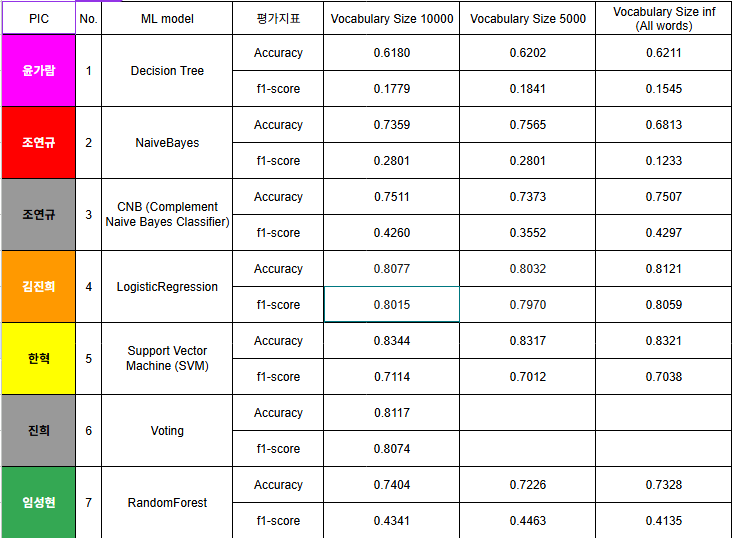

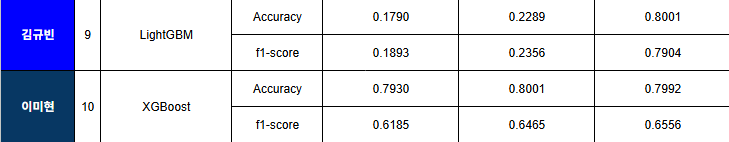

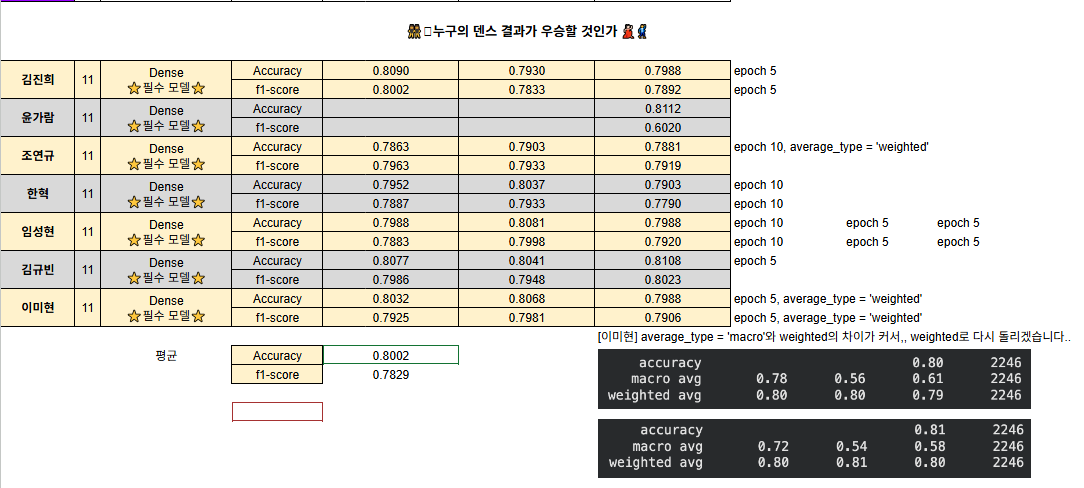

# 회고

제일좋은 머신러닝 모델은 'SVM' 이었다
1. 가장 높은 정확도
2. 가장 높은 F1-Score
3. 일괄성있는 높은 성능
-----------------------------------------------------
이유를 생각해보자
1. 고차원데이터 처리능력 탁월(TF-IDF 특성)
->과적합 위험 낮추면서도 강력한 분류 성능
2. 커널 트릭의 유연성
-> 커널 함수 사용해 무한대의 고차원 공간 매핑
3. 상대적 안정성
-> 확률기반모델(NAive Bayes)나 트리기반 앙상블 모델(Random Forest, Gradient Boostion)과 달리 확률/무작위성에 의존하지않음. ==> 하이퍼 파라미터 튜닝만 잘 되면 일관성있게 높은 결과를 도출

-------------------------------------------------------
- 흥미로운 점
Decision Tree, NaiveBayes, CNB는 굉장히 낮은 F1 score을 나타냈다. 그러다가 LogisticRegression부터 증가하는 추세를 보였다. 성현님의 RandomForest는 낮았지만 Accuracy는 잘 나온 모습이 신기했다.
가장 흥미로운 점은 규빈님의 LightGBM이다.
Vocabulary Size가 10000개나 5000개일 때는 굉장히 낮은 Accuracy와 F1-score을 보였는데 모두 다 포함하였을 때는 굉장히 좋은 성능을 보였다. 왜인지는? 더 알아봐야 할 것 같다.
-----------------------------------------------------
- 오늘의 학습 후기
오늘은 다양한 모델들을 가지고 성능을 비교해봤는데, 여러사람들과 같이 비교해보니깐 재밌었다.
그리고 전처리도 살짝 해봤는데 전처리의 의무에 따라서도 굉장히 많이 달라지는 것도 있었고,, epoch 크기에 대해서도 많이 논의하고, F1 score하는 것도 macro를 하느냐 weighted를 하느냐에 따라서 많이 달라지는 것 같아서 많은 것을 알아가는 하루였다!!

#오늘 할일
### 실험 또 실험 🤯


1. 단어장 개수를 바꾸면서(10000, 5000, Nan) 8개의 ML모델을 사용해보고  accuacry와 f1-score를 비교
(표로 나타내보세요~) (벡터화는 tf-idf로 통일)

아래 모델은 예시입니다, 여러 모델을 실험해보세요

### 📊 단어장 개수별 ML 모델 성능 비교 (Accuracy / F1-score)

| Vocabulary Size | Model             | Accuracy | F1-Score |
|------------------|------------------|----------|----------|
| 10000            | LogisticRegression |          |          |
|                  | SVM                |          |          |
|                  | RandomForest       |          |          |
|                  | XGBoost            |          |          |
|                  | NaiveBayes         |          |          |
|                  | Dense              |          |          |
|                  | LightGBM           |          |          |
|                  | DecisionTree       |          |          |
| 5000             | LogisticRegression |          |          |
|                  | SVM                |          |          |
|                  | RandomForest       |          |          |
|                  | XGBoost            |          |          |
|                  | NaiveBayes         |          |          |
|                  | Dense              |          |          |
|                  | LightGBM           |          |          |
|                  | DecisionTree       |          |          |
| NaN (All words)  | LogisticRegression |          |          |
|                  | SVM                |          |          |
|                  | RandomForest       |          |          |
|                  | XGBoost            |          |          |
|                  | NaiveBayes         |          |          |
|                  | Dense              |          |          |
|                  | LightGBM           |          |          |
|                  | DecisionTree       |          |          |

2. 딥러닝과 머신런닝의 차이 비교하기
- 딥러닝 모델 1개 Dense를 이용해서 비교해보세요 평가지표 = accuacry, f1-score

In [1]:
from tensorflow.keras.datasets import reuters
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# 데이터 준비
## index -> text
## DTM , TF-idf 학습데이터 준비

In [2]:
# 이부분에있는 num_words를 5000과 다른방법으로 바꿔보세요~

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [3]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [4]:
index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [5]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [6]:
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)

x_test = decoded_test
print(len(x_test))

2246


In [7]:
# 벡터화 DTM, TF-idf 방법
dtmvector = CountVectorizer()

tfidf_transformer = TfidfTransformer()

x_train_dtm = dtmvector.fit_transform(x_train)
x_test_dtm= dtmvector.transform(x_test)

x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

In [8]:
x_train_tfidf.shape

(8982, 4867)

In [9]:
x_test_tfidf.shape

(2246, 4867)

In [10]:
x_train[3]

"<sos> the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely <unk> borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian <unk> senior associate director of gao also said that a preliminary analysis of proposed changes in <unk> financial <unk> standards indicated as many as one half of <unk> borrowers who received new loans from the agency in 1986 would be <unk> under the proposed system the agency has proposed <unk> <unk> credit using a variety of financial <unk> instead of <unk> <unk> on <unk> ability senate agriculture committee chairman <unk> <unk> d <unk> <unk> the proposed <unk> changes telling <unk> administrator <unk> clark at a hearing that they would mark a dramatic shift in the <unk> purpose away from being <unk> <unk> of last <unk> toward becoming a big cit

# 모델 정의 및 실험

여러가지 모델을 바꾸며 실험해보세요~

In [14]:
# TF-idf데이터로 XGBoost 모델 학습하기

# 이친구도 시간좀 걸립니다!

from xgboost import XGBClassifier

# XGBoost 모델 학습
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, eval_metric='mlogloss')
xgb_model.fit(x_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# 예측
y_pred = xgb_model.predict(x_test_tfidf)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.7939
✅ F1-score : 0.6410


# Dense NN 딥러닝 모델

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM, Dense, Dropout


# 아래 Dense의 레이어를 바꿔가며 성능을 확인해봅시다

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

# 샘플 하나의 shape: (26506,)
inputs = Input(shape=(4867,))

x = Dense(512, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(46, activation='softmax')(x)  # 클래스 46개

dense_model = Model(inputs=inputs, outputs=outputs)

dense_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dense_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4867)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,492,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,564,014 (9.78 MB)

 Trainable params: 2,564,014 (9.78 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 시간이 좀 걸립니다! 한 20분정도..
dense_model.fit(x_train_tfidf, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 308s 1s/step - accuracy: 0.4815 - loss: 2.3075 - val_accuracy: 0.7596 - val_loss: 1.0985
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.7927 - loss: 0.9143 - val_accuracy: 0.8036 - val_loss: 0.8790
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 198s 877ms/step - accuracy: 0.8751 - loss: 0.5423 - val_accuracy: 0.8130 - val_loss: 0.8283
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 175s 779ms/step - accuracy: 0.9128 - loss: 0.3559 - val_accuracy: 0.8186 - val_loss: 0.8311
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 121s 539ms/step - accuracy: 0.9449 - loss: 0.2311 - val_accuracy: 0.8075 - val_loss: 0.9048


inf 결과

In [87]:

y_pred_proba = dense_model.predict(x_test_tfidf)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f"✅ 10000 Accuracy: {acc:.4f}")
print(f"✅ F1-score: {f1_macro:.4f}")
print(f"✅ F1-score (weighted): {f1_weighted:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 240ms/step
✅ Accuracy: 0.7988
✅ F1-score: 0.7892


단어장 10000개 결과

In [13]:
y_pred_proba = dense_model.predict(x_test_tfidf)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f"✅ 10000 Accuracy: {acc:.4f}")
print(f"✅ F1-score(macro): {f1_macro:.4f}")
print(f"✅ F1-score (weighted): {f1_weighted:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 197ms/step
✅ 10000 Accuracy: 0.8090
✅ F1-score(macro): 0.6020
✅ F1-score (weighted): 0.8002


단어장 5000개 결과

In [14]:
y_pred_proba = dense_model.predict(x_test_tfidf)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f"✅ 10000 Accuracy: {acc:.4f}")
print(f"✅ F1-score(macro): {f1_macro:.4f}")
print(f"✅ F1-score (weighted): {f1_weighted:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step
✅ 10000 Accuracy: 0.7930
✅ F1-score(macro): 0.5820
✅ F1-score (weighted): 0.7833


나의코드

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# 1. 모델 선언
# penalty='none': 규제를 적용하지 않음 (L1, L2 규제 모두 적용하지 않음)
# solver='lbfgs': 다중 분류에 적합하고 'penalty=none'을 지원하는 최적화 알고리즘
# max_iter=1000: 수렴을 위해 반복 횟수를 충분히 설정 (ConvergenceWarning 방지)
lr_no_penalty = LogisticRegression(penalty=None,
                                   solver='lbfgs',
                                   max_iter=1000,
                                   random_state=42,
                                   n_jobs=-1)

# 2. 모델 학습
# y_train (정수 레이블)을 그대로 사용하며, 원-핫 인코딩(X)
# x_train_tfidf는 Scipy 희소 행렬이어도 LogisticRegression은 잘 처리합니다.
lr_no_penalty.fit(x_train_tfidf, y_train)

# 3. 예측 및 평가
# 테스트 데이터 사용
y_pred_no_penalty = lr_no_penalty.predict(x_test_tfidf)

# 정확도 및 F1 Score 평가
accuracy = accuracy_score(y_test, y_pred_no_penalty)
f1_macro = f1_score(y_test, y_pred_no_penalty, average='weighted')

print("--- [규제 미적용 로지스틱 회귀 성능] ---")
print(f"테스트 정확도 (Accuracy): {accuracy:.4f}")
print(f"F1 Score (weighted): {f1_macro:.4f}")

--- [규제 미적용 로지스틱 회귀 성능] ---
테스트 정확도 (Accuracy): 0.8077
F1 Score (weighted): 0.8015


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score


# 1. 모델 선언 및 L2 규제 적용
# penalty='l2' (규제 적용)
# solver='lbfgs' (L2 규제와 다중 분류에 적합)
# C=1.0 (규제 강도의 역수)
lr_l2_final = LogisticRegression(penalty='l2',
                                 C=1.0,
                                 solver='lbfgs',
                                 max_iter=1000,
                                 random_state=42,
                                 n_jobs=-1)

# 2. 모델 학습
# x_train_tfidf (희소 행렬)과 y_train (정수 레이블)을 그대로 사용
lr_l2_final.fit(x_train_tfidf, y_train)

# 3. 예측 수행
y_pred_l2_final = lr_l2_final.predict(x_test_tfidf)

# 4. 성능 평가: F1 Score를 'weighted'로 설정
f1_weighted = f1_score(y_test, y_pred_l2_final, average='weighted')
accuracy = accuracy_score(y_test, y_pred_l2_final)

print("--- [최종 L2 규제 로지스틱 회귀 성능] ---")
print(f"테스트 정확도 (Accuracy): {accuracy:.4f}")
print(f"F1 Score (Weighted Average): {f1_weighted:.4f}")

--- [최종 L2 규제 로지스틱 회귀 성능] ---
테스트 정확도 (Accuracy): 0.7916
F1 Score (Weighted Average): 0.7670


In [27]:
# 정확도(Accuracy)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# F1 Score (매크로 평균은 모든 클래스를 동등하게 취급하여 다중 분류에 유용)
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

print(f"**[Logistic Regression 성능]**")
print(f"정확도 (Accuracy): {accuracy_lr:.4f}")
print(f"F1 Score (Macro): {f1_lr:.4f}")

# 상세 분류 보고서
# print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

**[Logistic Regression 성능]**
정확도 (Accuracy): 0.7979
F1 Score (Macro): 0.4814


In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score

# 1. 개별 베이스 모델 정의
# 각 모델은 확률을 출력할 수 있어야 합니다 (소프트 보팅을 위해).
# Logistic Regression (L2 규제 적용)
clf1 = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000, random_state=42, n_jobs=-1)

# Complement Naive Bayes (텍스트 분류에 적합)
clf2 = ComplementNB()

# Gradient Boosting Classifier (성능 좋은 트리 기반 모델)
clf3 = GradientBoostingClassifier(random_state=42)

# 2. 보팅 분류기 정의
# 'estimators' 리스트에 (이름, 모델 객체) 형태로 모델들을 전달합니다.
estimators = [('lr', clf1), ('cnb', clf2), ('gb', clf3)]

# voting='soft'로 설정하여 확률 평균 기반의 소프트 보팅을 사용합니다.
# n_jobs=-1로 설정하여 병렬 처리 속도를 높입니다.
voting_clf = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)

# 3. 모델 학습 (시간이 다소 걸릴 수 있습니다!)
# 희소 행렬인 x_train_tfidf를 그대로 사용합니다.
voting_clf.fit(x_train_tfidf, y_train)

# 4. 예측 수행
y_pred_voting = voting_clf.predict(x_test_tfidf)

# 5. 성능 평가 (F1 Score Weighted Average)
accuracy = accuracy_score(y_test, y_pred_voting)
f1_weighted = f1_score(y_test, y_pred_voting, average='weighted')

print("--- [보팅 분류기 최종 성능] ---")
print(f"테스트 정확도 (Accuracy): {accuracy:.4f}")
print(f"F1 Score (Weighted Average): {f1_weighted:.4f}")

--- [보팅 분류기 최종 성능] ---
테스트 정확도 (Accuracy): 0.8117
F1 Score (Weighted Average): 0.8074
